## Provena Summaries

Query Provena APIs for summary information.

### Provena workflow configuration setup

In [43]:
from provenaclient import ProvenaClient, Config
from provenaclient.auth import DeviceFlow
from provenaclient.auth.implementations import OfflineFlow

from pprint import pprint

In [44]:
import os
from dotenv import load_dotenv

# Provena config - replace with your Provena instance endpoints
client_config = Config(
    domain="dev.rrap-is.com",
    realm_name="rrap"
)

offline_mode = False

if offline_mode:
    load_dotenv()
    offline_token=os.getenv('PROVENA_API_TOKEN')
    assert offline_token, "Offline token must be present in .env file e.g. PROVENA_API_TOKEN=1234."
    print(f"Offline mode activated and token found in .env file.")

if not offline_mode:
    auth = DeviceFlow(config=client_config,
                    client_id="client-tools")
else:
    auth = OfflineFlow(config=client_config, offline_token=offline_token)


# Instantiate the client.
client = ProvenaClient(config=client_config, auth=auth)

### Fetching Dataset Summary Information

Print a list of all datasets

In [45]:
datasets_count = await client.datastore.list_all_datasets()
pprint(datasets_count)

[ItemDataset(display_name='test dataset 1', user_metadata={'another custom': 'annotation', 'my custom': 'annotation'}, collection_format=CollectionFormat(associations=CollectionFormatAssociations(organisation_id='10378.1/1925648', data_custodian_id='10378.1/1925649', point_of_contact='Not Peter Baker.'), approvals=CollectionFormatApprovals(ethics_registration=DatasetEthicsRegistrationCheck(relevant=False, obtained=False), ethics_access=DatasetEthicsAccessCheck(relevant=False, obtained=False), indigenous_knowledge=IndigenousKnowledgeCheck(relevant=False, obtained=False), export_controls=ExportControls(relevant=False, obtained=False)), dataset_info=CollectionFormatDatasetInfo(name='test dataset 1', description='test dataset 1', access_info=AccessInfo(reposited=True, uri=None, description=None), publisher_id='10378.1/1925648', created_date=datetime.date(2024, 7, 11), published_date=datetime.date(2024, 7, 11), license=AnyHttpUrl('https://example.com', ), purpose="But why, you might ask, wa

Get count of datasets in datastore.

In [46]:
print("The number of datasets in the datastore are:", len(datasets_count))

The number of datasets in the datastore are: 150


### Count of Each Entity (Subtype) within Your Provena Instance

In [47]:
item_counts = await client.registry.list_registry_items_with_count()
item_counts

{'CREATE': 196,
 'DATASET': 150,
 'PERSON': 26,
 'ORGANISATION': 17,
 'VERSION': 7,
 'MODEL': 11,
 'MODEL_RUN': 58,
 'DATASET_TEMPLATE': 13,
 'MODEL_RUN_WORKFLOW_TEMPLATE': 7,
 'STUDY': 4}

In [48]:
import pandas as pd

df = pd.DataFrame({"count" : pd.Series(item_counts)})
print(df)

                             count
CREATE                         196
DATASET                        150
PERSON                          26
ORGANISATION                    17
VERSION                          7
MODEL                           11
MODEL_RUN                       58
DATASET_TEMPLATE                13
MODEL_RUN_WORKFLOW_TEMPLATE      7
STUDY                            4


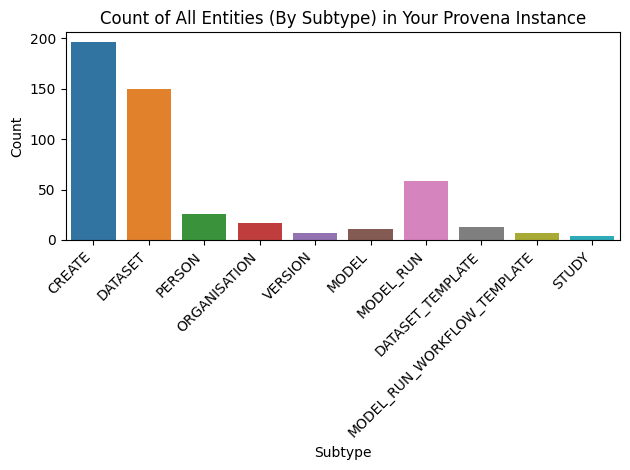

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x=df.index, y=df["count"], hue = df.index)

ax.set_title("Count of All Entities (By Subtype) in Your Provena Instance")
ax.set_xlabel("Subtype")
ax.set_ylabel("Count")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()